In [1]:
import nn
import eval
import cv2
import nrrd
import numpy as np
import glob
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.optimizers import SGD
from PIL import Image
from random import randint

C:\Users\vl.ostankovich\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
images = []
labels = []

square_size = 256

squares_per_img = 16

print ("Loading images and labels")
images_names = []

i=0
for file in glob.glob("images/*.jpg"):
    images_names.append(file.split(".jpg")[0].split("\\")[-1])

for i in range(0, len(images_names)): # load images form dataset to array
    images.append(np.asarray(cv2.imread("images/" + images_names[i] + ".jpg" )))
    labels.append(nrrd.read("labels/" + images_names[i] + ".nrrd" )[0].transpose([1, 0, 2]))
    print(images_names[i])
print (str(len(images)) + " images and labels loaded")

Loading images and labels
1529573994
1529574004
1529574008
1529574022
1529574034
1529574048
1529574062
1529574073
1529574095
1529574133
1529574204
1529574207
1529574232
1529574243
1529574274
1529574303
1529574309
1529574312
1529574340
1529574347
1529574354
1529574362
1529574373
1529574381
1529574388
1529574396
1529574405
1529574407
1529574415
1529574421
1529574429
1529574433
1529574439
1529574449
1529574453
1529574467
1529574479
1529574489
1529574502
1529574534
1529574552
1529574578
1529912032.86
1529912032
1529912033
1529912038
1529912039
1529912041
1529912043
1529912045
1529912048
1529912054
1529912059
1529912065
1529912067
1529912070
1529912086
1529912093
1529912104
1529912108
1529912111
1529912115
1529912119
1529912122
1529912125
1529912128
1529912131
1529912135
1529912140
1529912145
1529912153
1529912156
1529912158
1529912165
1529912179
1529912186
1529912204
1529912214
1529912224
1529912285
80 images and labels loaded


array([3, 3, 3, ..., 2, 2, 2], dtype=uint16)

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

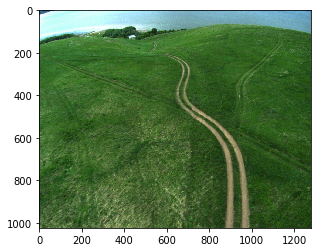

In [62]:
plt.imshow(cv2.cvtColor(images[4], cv2.COLOR_BGR2RGB))

In [63]:
squares_images = []
squares_labels = []

square_width = 256
square_height = 320

for i in range (0, len(images)):
        cur_img =images[i]
        cur_mask = labels[i] 
        for j in range (0, squares_per_img):
                start_point_row = randint(0, 768)
                start_point_col = randint(0, 960)
                squares_images.append(cur_img[start_point_row:start_point_row + 256, start_point_col:start_point_col + 320])
                squares_labels.append(cur_mask[start_point_row:start_point_row + 256, start_point_col:start_point_col + 320])

In [64]:
start_point_row = 0
start_point_col = 0

for k in range (0,0): # len(images)):
    cur_img = images[k]
    cur_mask = labels[k]
    
    squares_images.append(cur_img[0:256, 0:320])
    squares_labels.append(cur_mask[0:256, 0:320])

    squares_images.append(cur_img[256:512, 0:320])
    squares_labels.append(cur_mask[256:512, 0:320])

    squares_images.append(cur_img[512:768, 0:320])
    squares_labels.append(cur_mask[512:768, 0:320])

    squares_images.append(cur_img[768:1024, 0:320])
    squares_labels.append(cur_mask[768:1024, 0:320])
    

    squares_images.append(cur_img[0:256, 320:640])
    squares_labels.append(cur_mask[0:256, 320:640])

    squares_images.append(cur_img[256:512, 320:640])
    squares_labels.append(cur_mask[256:512, 320:640])

    squares_images.append(cur_img[512:768, 320:640])
    squares_labels.append(cur_mask[512:768, 320:640])

    squares_images.append(cur_img[768:1024, 320:640])
    squares_labels.append(cur_mask[768:1024, 320:640])


    squares_images.append(cur_img[0:256, 640:960])
    squares_labels.append(cur_mask[0:256, 640:960])

    squares_images.append(cur_img[256:512, 640:960])
    squares_labels.append(cur_mask[256:512, 640:960])

    squares_images.append(cur_img[512:768, 640:960])
    squares_labels.append(cur_mask[512:768, 640:960])

    squares_images.append(cur_img[768:1024, 640:960])
    squares_labels.append(cur_mask[768:1024, 640:960])
    

    squares_images.append(cur_img[0:256, 960:1280]) 
    squares_labels.append(cur_mask[0:256, 960:1280])

    squares_images.append(cur_img[256:512, 960:1280])
    squares_labels.append(cur_mask[256:512, 960:1280])

    squares_images.append(cur_img[512:768, 960:1280])
    squares_labels.append(cur_mask[512:768, 960:1280])

    squares_images.append(cur_img[768:1024, 960:1280])
    squares_labels.append(cur_mask[768:1024, 960:1280])

In [ ]:
images_train = np.concatenate([arr[np.newaxis] for arr in squares_images])
labels_train = np.concatenate([arr[np.newaxis] for arr in squares_labels])

print("convert to structure wtih class vectors")

map = np.zeros((len(images_train), square_width, square_height, 1))

for i in range (0, square_width):
	for j in range (0, square_height):
		for k in range (0, len(images_train)):
			if labels_train[k][i][j][0] == 1 or labels_train[k][i][j][0] == 12:
                        	map[k][i][j][0] = 1
labels_train = map
print("convertion done")
print(str(images_train.shape) + " " + str(labels_train.shape))


convert to structure wtih class vectors


In [ ]:
weights_path = "weights_bin.h5"

learn_rate = 0.0007
model = nn.get_custom_unet((square_width, square_height, 3), bin=True)
model.load_weights(weights_path)
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=learn_rate), metrics=['binary_accuracy'])
callbacks = [EarlyStopping(monitor='loss', patience=2, verbose=1, min_delta=0.01), ModelCheckpoint(weights_path, monitor='loss', save_best_only=True, verbose=2)]

In [ ]:
print("Start training")
model.fit(x=images_train, y=labels_train, callbacks=callbacks, epochs=1, batch_size=16)
print("Training finished")

In [ ]:
testImg = np.asarray(cv2.imread("images/1529912224.jpg"))
testMaks = nrrd.read("labels/1529912224.nrrd")[0].transpose([1, 0, 2])

In [ ]:
#score = model.evaluate(tesе, testMaks)
#print("model score is " + str(score))

print("Predicting")
squares_img_test = []
start_point_row = 0
start_point_col = 0
for i in range (0, 4):
        for j in range (0, 4):
                squares_img_test.append(testImg[start_point_row:start_point_row + 256, start_point_col:start_point_col + 320])
                print(squares_img_test[i + j].shape)
                start_point_col += 320
        start_point_col = 0
        start_point_row += 256

squares_img_test = np.concatenate([arr[np.newaxis] for arr in squares_img_test])
res = model.predict(squares_img_test, batch_size=1)
filename = "test.nrrd"

In [ ]:
m = 0
n = 0
test = np.zeros((1024, 1280, 1))
for sqV in range (0, 4):
        for sqH in range (0, 4):
                for i in range(0, square_width):
                        for j in range (0, square_height):
                            if res[sqV * 4 + sqH][i][j][0] > 0.5:
                                test[i + n][j + m][0] = 1
                m += 320

        m = 0
        n += 256
print(res)
nrrd.write(filename, (test))
#img = Image.fromarray(res[0][0].astype(int), 'I')
print(res[0].shape)
#img.save('test.png')
cv2.imwrite("test.jpg", testImg)
print("predicting finished")